In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
tf.__version__

'2.10.0'

In [3]:
dataset = pd.read_excel('Folds5x2_pp.xlsx')
print(dataset.shape)
dataset.head()

(9568, 5)


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


AT - temperature (1.81 C - 37.11 C)  
V - Exhaust Vacuum (25.36 - 81.56 cm/Hg)  
AP - Ambient Pressure (992.89 - 1033.30 milibar)  
RH - Relative Humidity (25.56 - 100.16 %)  

PE - Net hourly electrical energy output (420.26 - 495.76 MW)

<Figure size 600x800 with 0 Axes>

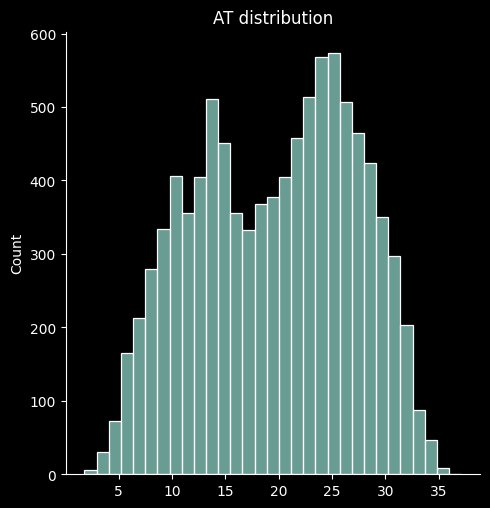

<Figure size 600x800 with 0 Axes>

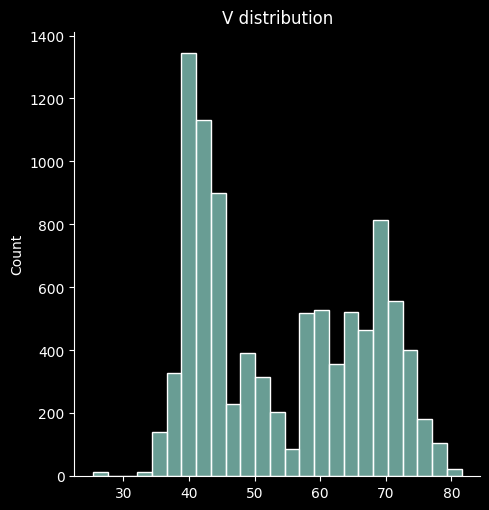

<Figure size 600x800 with 0 Axes>

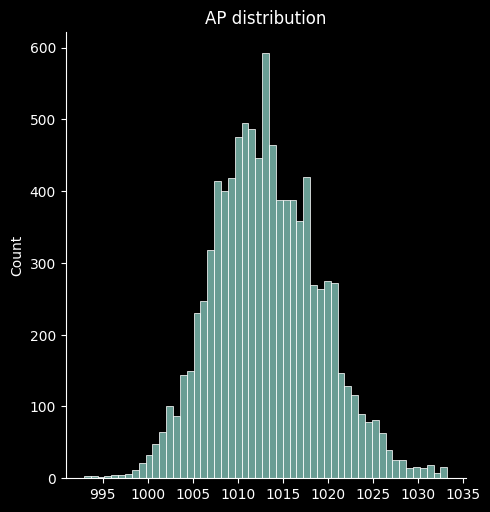

<Figure size 600x800 with 0 Axes>

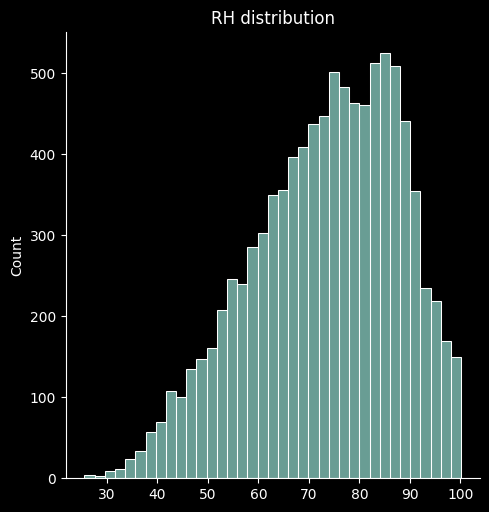

<Figure size 600x800 with 0 Axes>

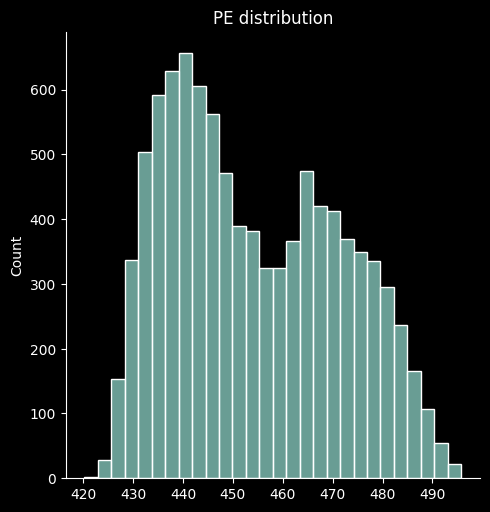

In [4]:
for i in list(dataset.columns):

    plt.figure(figsize=(6,8))

    sns.displot(dataset[f'{i}'].values)

    plt.title(f'{i} distribution')
    plt.show()

In [5]:
# features
X = dataset.iloc[:, :-1].values

# vector
y = dataset.iloc[:, -1].values

print(len(X))
print(len(y))

9568
9568


In [6]:
# Splitting the dataset into the Train set and the Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(f'X_train len: {len(X_train)}', end="\n")
print(f'X_test len: {len(X_test)}', end="\n")
print(f'y_train len: {len(y_train)}', end="\n")
print(f'y_test len: {len(y_test)}')


X_train len: 7654
X_test len: 1914
y_train len: 7654
y_test len: 1914


### Part 2. Building the ANN

In [7]:
# Initializing ANN

ann = tf.keras.models.Sequential()

#### Adding the input layer and the first hidden layer

In [8]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#### Adding the second hidden layer

In [9]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#### Adding the output layer

In [10]:
ann.add(tf.keras.layers.Dense(units=1))

### Part 3 - Training the ANN

#### Compiling the ANN

In [11]:
ann.compile(optimizer='adam', loss = 'mean_squared_error')

#### Training the ANN on the Training set

In [12]:
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
240/240 [==============================] - 4s 4ms/step - loss: 23778.5020
Epoch 2/100
240/240 [==============================] - 1s 5ms/step - loss: 688.7394
Epoch 3/100
240/240 [==============================] - 1s 5ms/step - loss: 658.6228
Epoch 4/100
240/240 [==============================] - 1s 4ms/step - loss: 622.4035
Epoch 5/100
240/240 [==============================] - 1s 5ms/step - loss: 581.0517
Epoch 6/100
240/240 [==============================] - 1s 5ms/step - loss: 537.1956
Epoch 7/100
240/240 [==============================] - 1s 4ms/step - loss: 492.0417
Epoch 8/100
240/240 [==============================] - 1s 4ms/step - loss: 445.2123
Epoch 9/100
240/240 [==============================] - 1s 4ms/step - loss: 398.7059
Epoch 10/100
240/240 [==============================] - 1s 3ms/step - loss: 353.0823
Epoch 11/100
240/240 [==============================] - 1s 3ms/step - loss: 310.0421
Epoch 12/100
240/240 [==============================] - 1s 4ms/step - lo

#### Predicting the result of the Test set


In [13]:
y_pred = ann.predict(X_test)

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

60/60 [==============================] - 0s 2ms/step
[[431.49 431.23]
 [462.68 460.01]
 [465.86 461.14]
 ...
 [473.17 473.26]
 [440.1  438.  ]
 [459.21 463.28]]


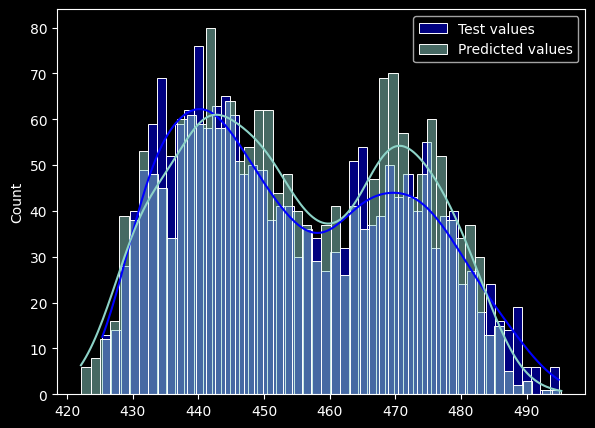

In [15]:
# Comapare distribution
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

sns.histplot(y_test, color='blue', kde=True, label='Test values', bins=50)
sns.histplot(y_pred, color='green', kde=True, label='Predicted values', bins=50)

plt.legend()
plt.show()